In [2]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-2.4.7'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark


# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
^C
^C


In [3]:
#Travis smells like elderberries
#Can confirm
!pip install s3fs
import pandas as pd
import s3fs
df = pd.read_csv('s3://ucsd-diamond-project/diamonds.csv')

     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 102kB 5.5MB/s 
     |████████████████████████████████| 7.2MB 7.9MB/s 
     |████████████████████████████████| 1.3MB 38.6MB/s 
     |████████████████████████████████| 143kB 16.1MB/s 
     |████████████████████████████████| 143kB 39.4MB/s 
     |████████████████████████████████| 296kB 42.9MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-1.2.0-cp36-none-any.whl size=45554 sha256=33793569e96c7f55f7651b27fcc3589dc200f1bc6a9ca3ec38d9c0057e457881
  Stored in directory: /root/.cache/pip/wheels/9a/47/92/5873782cddd0c32be41eb43475d1f7e532d420cfa30a89b988
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=10641531e23f7b52e22bc506956699a4da1109c722291aafae02b6109449eb59
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built aiobotocore idna-ssl
ERROR: requests 2.23.0 has requirement urll

In [ ]:
df

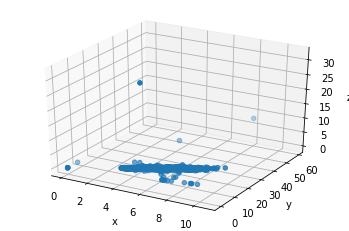

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['x'], df['y'], df['z'])
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()

In [6]:
# Descriptive Statistics for Good 
statistics_ideal = df[df['cut']=='Good'].describe()
statistics_ideal.rename(columns=lambda x: x+'ideal', inplace=True)

# Descriptive Statistics for Good 
statistics_very_good = df[df['cut']=='Very Good'].describe()
statistics_very_good.rename(columns=lambda x: x+'very_good', inplace=True)

# Descriptive Statistics for Good 
statistics_premium = df[df['cut']=='Premium'].describe()
statistics_premium.rename(columns=lambda x: x+'premium', inplace=True)

# Descriptive Statistics for Good 
statistics_ideal = df[df['cut']=='Ideal'].describe()
statistics_ideal.rename(columns=lambda x: x+'ideal', inplace=True)

# Descriptive Statistics for Good 
statistics_fair = df[df['cut']=='Fair'].describe()
statistics_fair.rename(columns=lambda x: x+'fair', inplace=True)

statistics = pd.concat([statistics_ideal, statistics_very_good, statistics_premium, statistics_ideal, statistics_fair], axis=1)
statistics 

,idideal,caratideal,depthideal,table_ratioideal,priceideal,xideal,yideal,zideal,idvery_good,caratvery_good,depthvery_good,table_ratiovery_good,pricevery_good,xvery_good,yvery_good,zvery_good,idpremium,caratpremium,depthpremium,table_ratiopremium,pricepremium,xpremium,ypremium,zpremium,idideal,caratideal,depthideal,table_ratioideal,priceideal,xideal,yideal,zideal,idfair,caratfair,depthfair,table_ratiofair,pricefair,xfair,yfair,zfair
count,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,12082.000000,12082.000000,12082.000000,12082.000000,12082.000000,12082.000000,12082.000000,12082.000000,13791.000000,13791.000000,13791.000000,13791.000000,13791.000000,13791.000000,13791.000000,13791.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,29047.630736,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448,26097.313193,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801,25600.209049,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124,29047.630736,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448,24147.357764,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
std,15044.527014,0.432876,0.718539,1.246423,3808.401172,1.064210,1.074495,0.657648,16013.360517,0.459435,1.378631,2.121448,3935.862161,1.100839,1.102924,0.730228,14917.011708,0.515262,1.158815,1.478573,4349.204961,1.188252,1.259751,0.731161,15044.527014,0.432876,0.718539,1.246423,3808.401172,1.064210,1.074495,0.657648,18021.165757,0.516404,3.643428,3.946261,3560.386612,0.964317,0.956380,0.651638
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,6.000000,0.200000,56.800000,44.000000,336.000000,0.000000,0.000000,0.000000,2.000000,0.200000,58.000000,51.000000,326.000000,0.000000,0.000000,0.000000,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,9.000000,0.220000,43.000000,49.000000,337.000000,0.000000,0.000000,0.000000
25%,17016.000000,0.350000,61.300000,55.000000,878.000000,4.540000,4.550000,2.800000,12042.750000,0.410000,60.900000,56.000000,912.000000,4.750000,4.770000,2.950000,13048.000000,0.410000,60.500000,58.000000,1046.000000,4.800000,4.790000,2.940000,17016.000000,0.350000,61.300000,55.000000,878.000000,4.540000,4.550000,2.800000,7386.000000,0.700000,64.400000,56.000000,2050.250000,5.630000,5.570000,3.610000
50%,31069.000000,0.540000,61.800000,56.000000,1810.000000,5.250000,5.260000,3.230000,24916.000000,0.710000,62.100000,58.000000,2648.000000,5.740000,5.770000,3.560000,24635.000000,0.860000,61.400000,59.000000,3185.000000,6.110000,6.060000,3.720000,31069.000000,0.540000,61.800000,56.000000,1810.000000,5.250000,5.260000,3.230000,19683.000000,1.000000,65.000000,58.000000,3282.000000,6.175000,6.100000,3.970000
75%,41416.500000,1.010000,62.200000,57.000000,4678.500000,6.440000,6.445000,3.980000,41022.750000,1.020000,62.900000,59.000000,5372.750000,6.470000,6.510000,4.020000,38021.500000,1.200000,62.200000,60.000000,6296.000000,6.800000,6.760000,4.160000,41416.500000,1.010000,62.200000,57.000000,4678.500000,6.440000,6.445000,3.980000,42547.750000,1.200000,65.900000,61.000000,5205.500000,6.700000,6.640000,4.280000
max,53940.000000,3.500000,66.700000,63.000000,18806.000000,9.650000,31.800000,6.030000,53938.000000,4.000000,64.900000,66.000000,18818.000000,10.010000,9.940000,31.800000,53939.000000,4.010000,63.000000,62.000000,18823.000000,10.140000,58.900000,8.060000,53940.000000,3.500000,66.700000,63.000000,18806.000000,9.650000,31.800000,6.030000,53883.000000,5.010000,79.000000,95.000000,18574.000000,10.740000,10.540000,6.980000


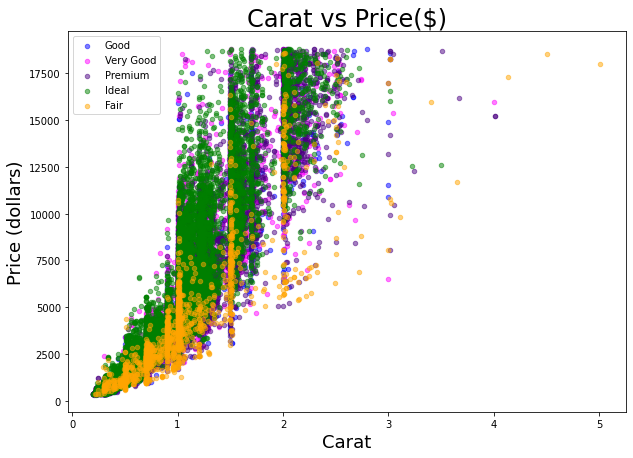

In [7]:
ax1 = df[df['cut'] == 'Good'].plot(kind='scatter', x='carat', y='price', color='blue', alpha=0.5, figsize=(10, 7))
df[df['cut'] == 'Very Good'].plot(kind='scatter', x='carat', y='price', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
df[df['cut'] == 'Premium'].plot(kind='scatter', x='carat', y='price', color='indigo', alpha=0.5, figsize=(10 ,7), ax=ax1)
df[df['cut'] == 'Ideal'].plot(kind='scatter', x='carat', y='price', color='green', alpha=0.5, figsize=(10 ,7), ax=ax1)
df[df['cut'] == 'Fair'].plot(kind='scatter', x='carat', y='price', color='orange', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Good', 'Very Good', 'Premium','Ideal','Fair'])
plt.title('Carat vs Price($)', size=24)
plt.xlabel('Carat', size=18)
plt.ylabel('Price (dollars)', size=18);

Text(0, 0.5, 'Price (dollars)')

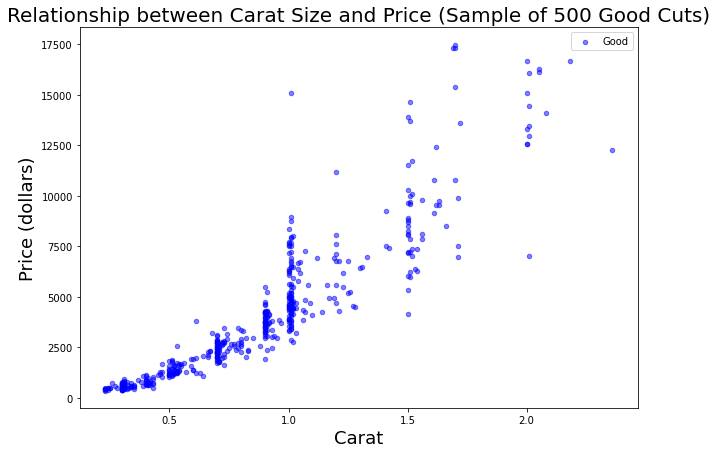

Text(0, 0.5, 'Price (dollars)')

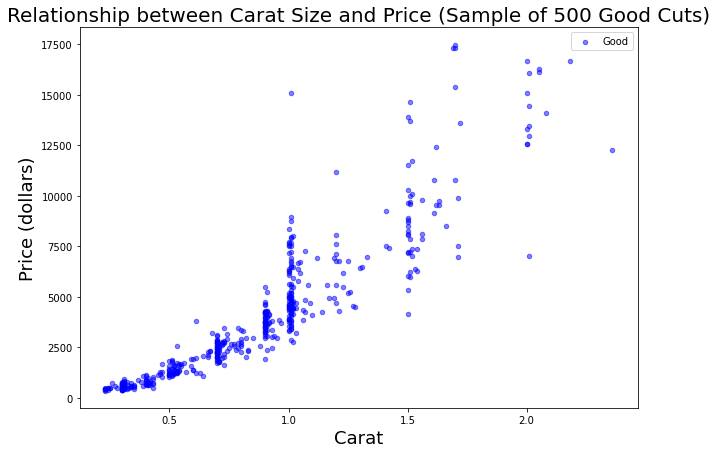

In [8]:
sample_good = df[df['cut'] == 'Good'].sample(500)
sample_good.plot(kind='scatter', x='carat', y='price', color='blue', alpha = 0.5, figsize=(10,7))
plt.legend(labels = ['Good'])
plt.title('Relationship between Carat Size and Price (Sample of 500 Good Cuts)', size = 20)
plt.xlabel('Carat', size = 18)
plt.ylabel('Price (dollars)', size = 18) 

Text(0, 0.5, 'Price (dollars)')

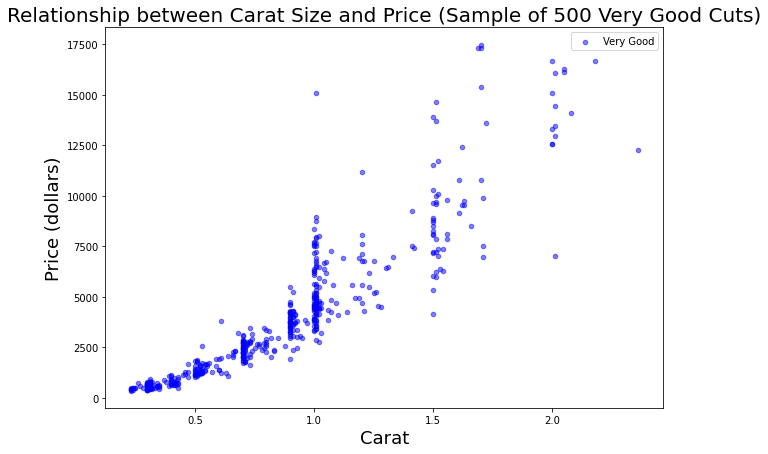

In [9]:
sample_very_good = df[df['cut'] == 'Very Good'].sample(500)
sample_good.plot(kind='scatter', x='carat', y='price', color='blue', alpha = 0.5, figsize=(10,7))
plt.legend(labels = ['Very Good'])
plt.title('Relationship between Carat Size and Price (Sample of 500 Very Good Cuts)', size = 20)
plt.xlabel('Carat', size = 18)
plt.ylabel('Price (dollars)', size = 18) 

Text(0, 0.5, 'Price (dollars)')

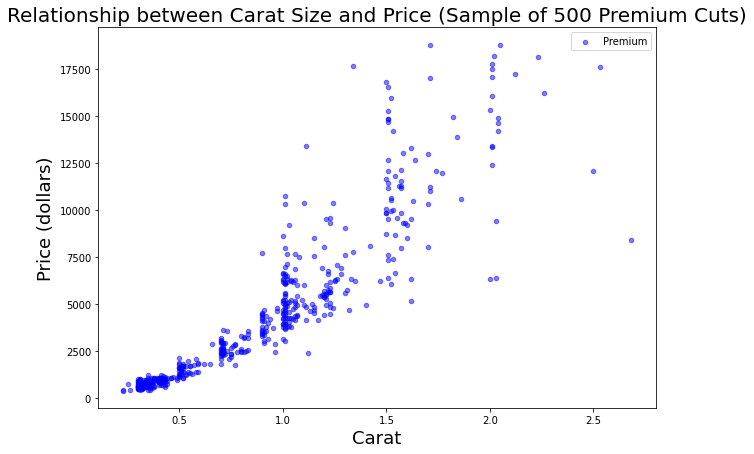

In [10]:
sample_good = df[df['cut'] == 'Premium'].sample(500)
sample_good.plot(kind='scatter', x='carat', y='price', color='blue', alpha = 0.5, figsize=(10,7))
plt.legend(labels = ['Premium'])
plt.title('Relationship between Carat Size and Price (Sample of 500 Premium Cuts)', size = 20)
plt.xlabel('Carat', size = 18)
plt.ylabel('Price (dollars)', size = 18) 

Text(0, 0.5, 'Price (dollars)')

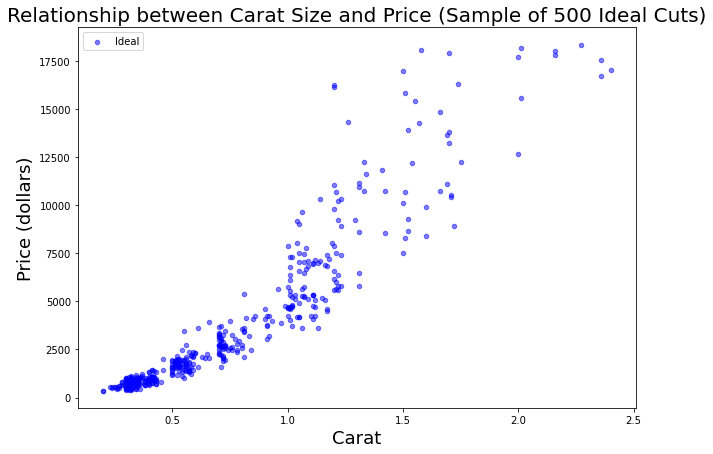

In [11]:
sample_good = df[df['cut'] == 'Ideal'].sample(500)
sample_good.plot(kind='scatter', x='carat', y='price', color='blue', alpha = 0.5, figsize=(10,7))
plt.legend(labels = ['Ideal'])
plt.title('Relationship between Carat Size and Price (Sample of 500 Ideal Cuts)', size = 20)
plt.xlabel('Carat', size = 18)
plt.ylabel('Price (dollars)', size = 18) 

Text(0, 0.5, 'Price (dollars)')

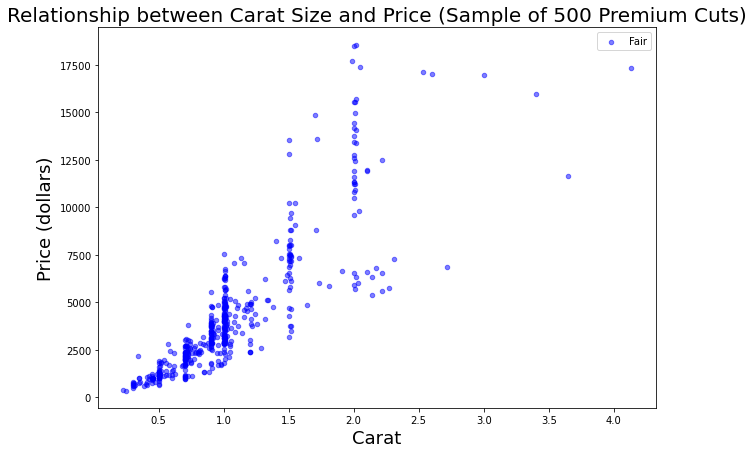

In [12]:
sample_good = df[df['cut'] == 'Fair'].sample(500)
sample_good.plot(kind='scatter', x='carat', y='price', color='blue', alpha = 0.5, figsize=(10,7))
plt.legend(labels = ['Fair'])
plt.title('Relationship between Carat Size and Price (Sample of 500 Premium Cuts)', size = 20)
plt.xlabel('Carat', size = 18)
plt.ylabel('Price (dollars)', size = 18) 

In [13]:
import numpy as np

df_good = df[df['cut'] == 'Good']
df_very_good = df[df['cut'] == 'Very Good']
df_premium = df[df['cut'] == 'Premium']
df_ideal = df[df['cut'] == 'Ideal']
df_fair = df[df['cut'] == 'Fair']

good_fit = np.polyfit(df_good.carat, df_good.price, 1)
very_good_fit = np.polyfit(df_very_good.carat, df_very_good.price, 1)
premium_fit = np.polyfit(df_premium.carat, df_premium.price, 1)
ideal_fit = np.polyfit(df_ideal.carat, df_ideal.price, 1)
fair_fit = np.polyfit(df_fair.carat, df_fair.price, 1)



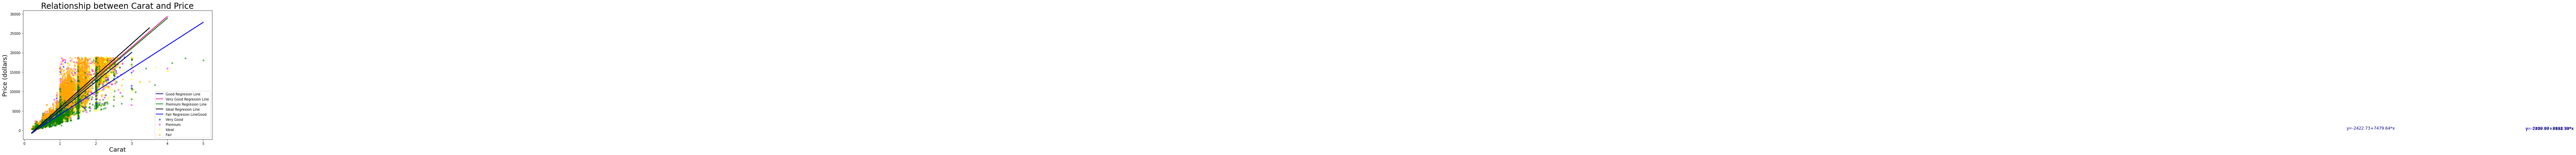

In [16]:
ax1 = df_good.plot(kind='scatter', x='carat', y='price', color='blue', alpha=0.5, figsize= (10,7))
df_very_good.plot(kind='scatter', x='carat', y='price', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
df_premium.plot(kind='scatter', x='carat', y='price', color='yellow', alpha=0.5, figsize=(10, 7), ax=ax1)
df_ideal.plot(kind='scatter', x='carat', y='price', color='orange', alpha=0.5, figsize=(10, 7), ax=ax1)
df_fair.plot(kind='scatter', x='carat', y='price', color='green', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_good.carat, good_fit[0] * df_good.carat + good_fit[1], color='darkblue', linewidth=2)
plt.plot(df_very_good.carat, very_good_fit[0] * df_very_good.carat + very_good_fit[1], color='deeppink', linewidth=2)
plt.plot(df_premium.carat, premium_fit[0] * df_premium.carat + premium_fit[1], color='green', linewidth=2)
plt.plot(df_ideal.carat, ideal_fit[0] * df_ideal.carat + ideal_fit[1], color='black', linewidth=2)
plt.plot(df_fair.carat, fair_fit[0] * df_fair.carat + fair_fit[1], color='blue', linewidth=2)


# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(good_fit[1], good_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(very_good_fit[1], very_good_fit[0]), color='deeppink', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(premium_fit[1], premium_fit[0]), color='green', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(ideal_fit[1], ideal_fit[0]), color='black', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(fair_fit[1], fair_fit[0]), color='blue', size=12)



# legend, title and labels.
plt.legend(labels=['Good Regresion Line', 'Very Good Regresion Line', 'Premium Regresion Line', 'Ideal Regresion Line', 'Fair Regresion Line'\
                   'Good', 'Very Good','Premium','Ideal','Fair'])
plt.title('Relationship between Carat and Price', size=24)
plt.xlabel('Carat', size=18)
plt.ylabel('Price (dollars)', size=18);


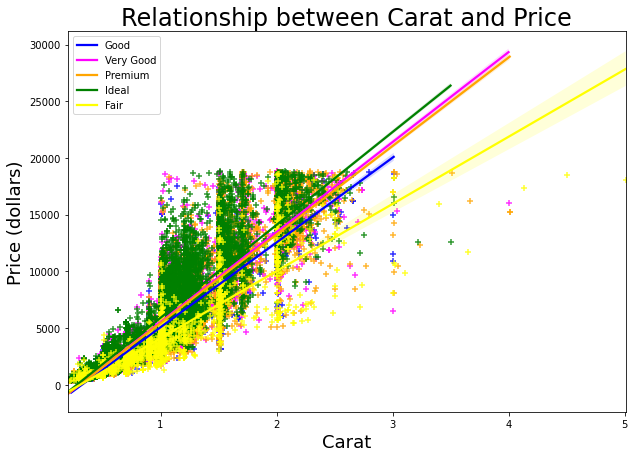

In [18]:
import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_good.carat, y=df_good.price, color='blue', marker='+')
sns.regplot(x=df_very_good.carat, y=df_very_good.price, color='magenta', marker='+')
sns.regplot(x=df_premium.carat, y=df_premium.price, color='orange', marker='+')
sns.regplot(x=df_ideal.carat, y=df_ideal.price, color='green', marker='+')
sns.regplot(x=df_fair.carat, y=df_fair.price, color='yellow', marker='+')


# Legend, title and labels.
plt.legend(labels=['Good', 'Very Good','Premium','Ideal','Fair'])
plt.title('Relationship between Carat and Price', size=24)
plt.xlabel('Carat', size=18)
plt.ylabel('Price (dollars)', size=18);

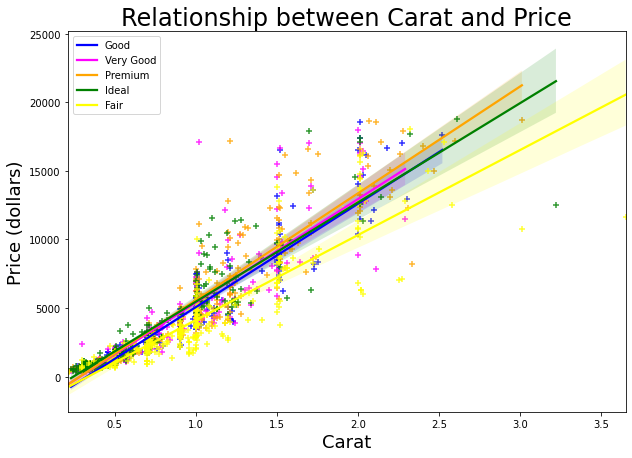

In [19]:
import seaborn as sns

df_good_sample = df[df['cut']=='Good'].sample(300)
df_very_good_sample = df[df['cut']=='Very Good'].sample(300)
df_premium_sample = df[df['cut']=='Premium'].sample(300)
df_ideal_sample = df[df['cut']=='Ideal'].sample(300)
df_fair_sample = df[df['cut']=='Fair'].sample(300)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_good_sample.carat, y=df_good_sample.price, color='blue', marker='+')
sns.regplot(x=df_very_good_sample.carat, y=df_very_good_sample.price, color='magenta', marker='+')
sns.regplot(x=df_premium_sample.carat, y=df_premium_sample.price, color='orange', marker='+')
sns.regplot(x=df_ideal_sample.carat, y=df_ideal_sample.price, color='green', marker='+')
sns.regplot(x=df_fair_sample.carat, y=df_fair_sample.price, color='yellow', marker='+')


# Legend, title and labels.
plt.legend(labels=['Good', 'Very Good','Premium','Ideal','Fair'])
plt.title('Relationship between Carat and Price', size=24)
plt.xlabel('Carat', size=18)
plt.ylabel('Price (dollars)', size=18);

In [37]:
from sklearn.linear_model import LinearRegression

df_good = df[df['cut'] == 'Good']
df_very_good = df[df['cut'] == 'Very Good']
df_premium = df[df['cut'] == 'Premium']
df_ideal = df[df['cut'] == 'Ideal']
df_fair = df[df['cut'] == 'Fair']


# create linear regression object
lr_good = LinearRegression()
lr_very_good = LinearRegression()
lr_premium = LinearRegression()
lr_ideal = LinearRegression()
lr_fair = LinearRegression()

# fit linear regression
lr_good.fit(df_good[['carat']], df_good['price'])
lr_very_good.fit(df_very_good[['carat']], df_very_good['price'])
lr_premium.fit(df_premium[['carat']], df_premium['price'])
lr_ideal.fit(df_ideal[['carat']], df_ideal['price'])
lr_fair.fit(df_fair[['carat']], df_fair['price'])


# get the slope and intercept of the line best fit

def good_lr (x):
  good_lr_line = lr_good.coef_[0]*x + lr_good.intercept_
  return(good_lr_line)

def very_good_lr (x):
  very_good_lr_line = lr_very_good.coef_[0]*x + lr_very_good.intercept_
  return(very_good_lr_line)

def premium_lr (x):
  premium_lr_line = lr_premium.coef_[0]*x + lr_premium.intercept_
  return(premium_lr_line)

def ideal_lr (x):
  ideal_lr_line = lr_ideal.coef_[0]*x + lr_ideal.intercept_
  return(ideal_lr_line)

def fair_lr (x):
  fair_lr_line = lr_fair.coef_[0]*x + lr_fair.intercept_
  return(fair_lr_line)

In [38]:
df["cut"].replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}, inplace = True)

In [39]:
df

,id,carat,cut,color,clarity,depth,table_ratio,price,x,y,z
0,1,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,5,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,4,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [56]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df[['carat', 'cut', 'depth', 'table_ratio']], df['price'])

def mult_reg (w,x,y,z):
  price = (mlr.coef_[0]*w) + (mlr.coef_[1]*x) + (mlr.coef_[2]*y) + (mlr.coef_[3]*z) + mlr.intercept_
  return(price) 

In [55]:
mult_reg(5,4,61.5,55)

37179.51078421372

In [ ]:
# install
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql postgresql+psycopg2://@/postgres

 * Starting PostgreSQL 10 database server
   ...done.
CREATE ROLE


/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


'Connected: @postgres'

In [ ]:
!sudo -u postgres psql


psql (10.15 (Ubuntu 10.15-0ubuntu0.18.04.1))
Type "help" for help.

postgres=# 

In [ ]:

# For exit from command line:
# \q

In [ ]:
!sudo -u postgres createuser --interactive

In [ ]:
!sudo -u postgres createdb diamonds_db

In [ ]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url="https://ucsd-diamond-project.s3.us-east-2.amazonaws.com/diamonds.csv"
spark.sparkContext.addFile(url)
diamonds_df = spark.read.csv(SparkFiles.get("diamonds.csv"), sep=",", header=True, inferSchema=True)

# Show DataFrame
diamonds_df.show()